# **Gradient Descent**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/spiral.csv')


X = data.iloc[:, :2].values  # Input features
y = data.iloc[:, 2].values  # Labels

# Data normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std


data

,x1,x2,y
0,0.371268,-0.012075,0
1,0.281894,0.044798,0
2,0.508074,-0.438310,1
3,0.362393,0.863403,1
4,0.381005,0.062693,0
...,...,...,...
195,-0.287156,-0.378036,1
196,-1.253208,0.364238,0
197,-1.166070,0.211895,0
198,-0.581621,0.760125,1


Iteration 0: Loss 0.9683054267570568
Iteration 100: Loss 5.343622460727527
Iteration 200: Loss 3.274572785002302
Iteration 300: Loss 3.025817993713267
Iteration 400: Loss 2.4097685402012843
Iteration 500: Loss 5.472852909302324
Iteration 600: Loss 2.40614983700045
Iteration 700: Loss 0.9010561509126392
Iteration 800: Loss 1.354725977053852
Iteration 900: Loss 1.4880756456890376
Iteration 1000: Loss 1.744669624499981
Iteration 1100: Loss 1.050972021880336
Iteration 1200: Loss 1.326698087499635
Iteration 1300: Loss 2.140666987664509
Iteration 1400: Loss 2.1432151638473753
Iteration 1500: Loss 1.88618079291347
Iteration 1600: Loss 1.3834453469892858
Iteration 1700: Loss 1.7671683562517269
Iteration 1800: Loss 1.6248288757137248
Iteration 1900: Loss 0.8872418070523155
Iteration 2000: Loss 1.193250091229755
Iteration 2100: Loss 1.2182350032540439
Iteration 2200: Loss 1.0153201599994155
Iteration 2300: Loss 0.9195388646354179
Iteration 2400: Loss 0.9163230016332933
Iteration 2500: Loss 0.896

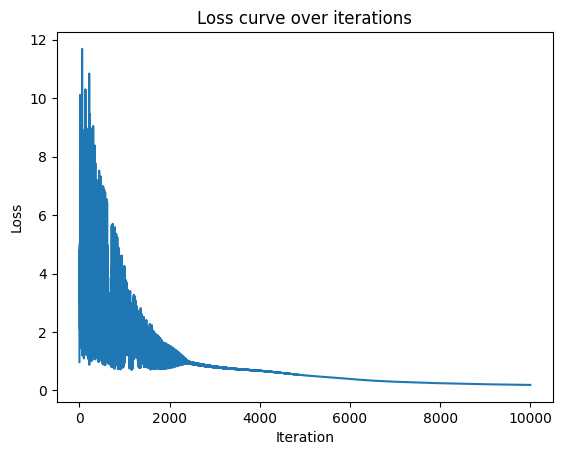

In [ ]:
np.random.seed(42)
input_size = X.shape[1]  # 2
hidden_size = 1000
output_size = 2

W = np.random.randn(hidden_size, input_size) * np.sqrt(2. / input_size)
b = np.zeros((hidden_size, 1))
W_prime = np.random.randn(output_size, hidden_size) * np.sqrt(2. / hidden_size)
b_prime = np.zeros((output_size, 1))



def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def compute_loss(y_true, y_pred):
    n = y_true.shape[0]
    y_true_one_hot = np.zeros((n, output_size))
    y_true_one_hot[np.arange(n), y_true] = 1
    log_likelihood = -np.log(y_pred) * y_true_one_hot
    loss = np.sum(log_likelihood) / n
    return loss

# Gradient descent parameters

initial_learning_rate = 0.1
learning_rate = initial_learning_rate
learning_rate_decay = 0.9
num_iterations = 10000
patience = 10000  # Number of iterations to wait for improvement before reducing learning rate
min_delta = 0.0001  # Minimum change in the monitored quantity to qualify as an improvement
losses = []
best_loss = np.inf
iterations_since_improvement = 0


# Store loss for plotting
losses = []

# Initialize the learning rate
learning_rate = initial_learning_rate

for i in range(num_iterations):
    # Forward pass
    z = np.dot(W, X.T) + b
    a = relu(z)
    y_hat = np.dot(W_prime, a) + b_prime
    y_pred = softmax(y_hat)

    # Compute loss
    loss = compute_loss(y, y_pred.T)
    losses.append(loss)

    # Backward pass
    delta1 = y_pred - np.eye(output_size)[y].T
    delta2_t = np.dot(W_prime.T, delta1) * relu_derivative(z)

    db_prime = np.sum(delta1, axis=1, keepdims=True) / X.shape[0]
    dW_prime = np.dot(delta1, a.T) / X.shape[0]
    db = np.sum(delta2_t, axis=1, keepdims=True) / X.shape[0]
    dW = np.dot(delta2_t, X) / X.shape[0]

    # Parameters update
    W -= learning_rate * dW
    b -= learning_rate * db
    W_prime -= learning_rate * dW_prime
    b_prime -= learning_rate * db_prime

    if loss + min_delta < best_loss:
        best_loss = loss
        iterations_since_improvement = 0
    else:
        iterations_since_improvement += 1
        if iterations_since_improvement >= patience:
            learning_rate *= learning_rate_decay
            iterations_since_improvement = 0
            print(f"Reduced learning rate to {learning_rate}")

    # Print the loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Loss {loss}")



# Plot loss curve
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss curve over iterations')
plt.show()

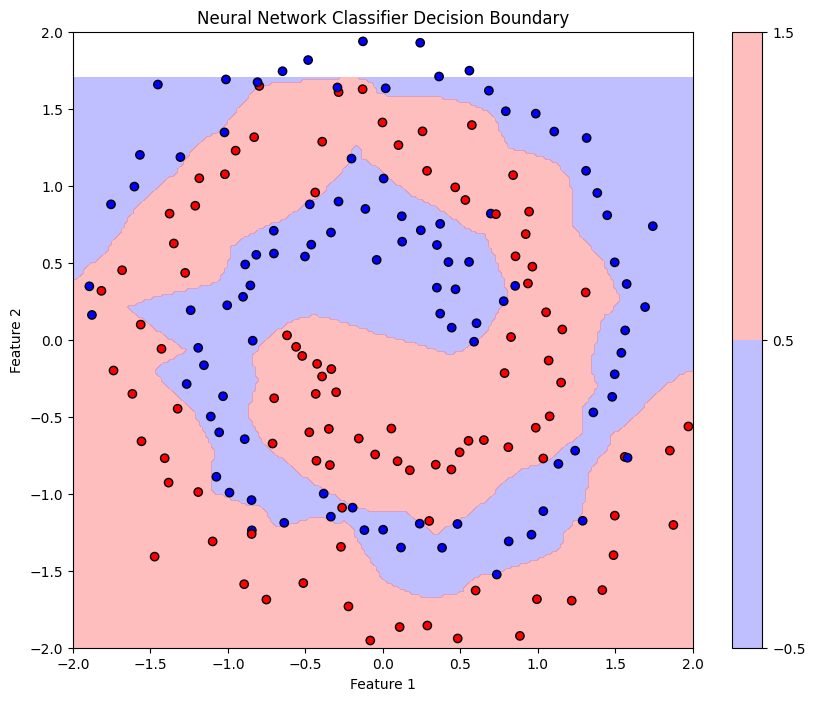

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dense grid
x1_range = np.linspace(-2, 2, 200)
x2_range = np.linspace(-2, 1.7, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)
grid = np.column_stack([X1.ravel(), X2.ravel()])


# Normalize the grid data
# grid_normalized = (grid - X_mean) / X_std  # Apply the same transformation as the training data

#Forward pass for the grid
Z_grid = relu(np.dot(grid, W.T) + b.T)
Y_hat_grid = softmax(np.dot(Z_grid, W_prime.T) + b_prime.T)

# Now look at the two components of y
Y_pred = np.where(Y_hat_grid[:, 0] >= Y_hat_grid[:, 1], 0, 1)

# Reshape the predictions back to the grid shape
Z = Y_pred.reshape(X1.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Z, alpha=0.5, levels=np.arange(3) - 0.5, cmap='bwr')
#plt.contourf(X[:, 0], X[:, 1], Z, alpha=0.5, levels=np.arange(3) - 0.5, cmap='bwr')
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
plt.title('Neural Network Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.show()

